In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Titanic dataset
df = pd.read_csv("task1_Titanic-Dataset.csv")

In [ ]:
# Show basic structure and column data types
df.info()
df.describe(include='all')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Drop columns that are not useful for prediction or have too many missing/unique values
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
# Identify numerical columns (excluding the target variable 'Survived')
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('Survived')
print("Numerical Columns:", numerical_cols)

Numerical Columns: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


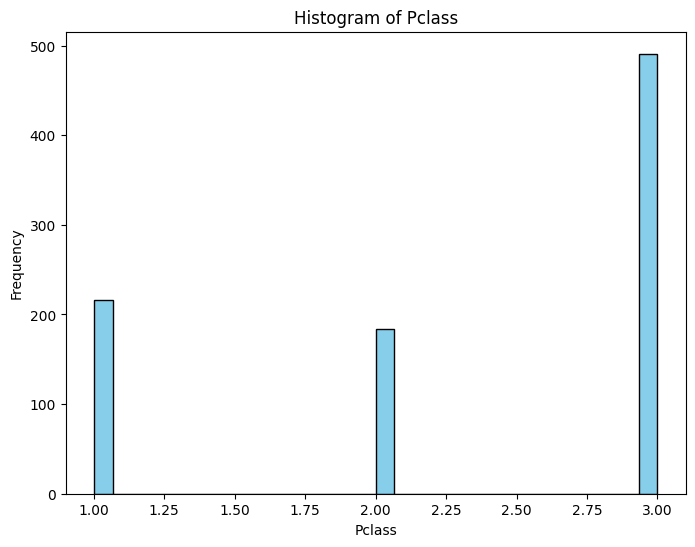

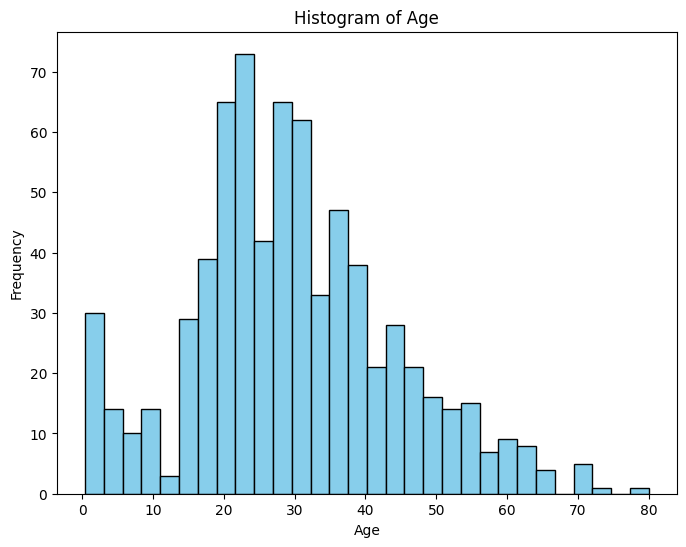

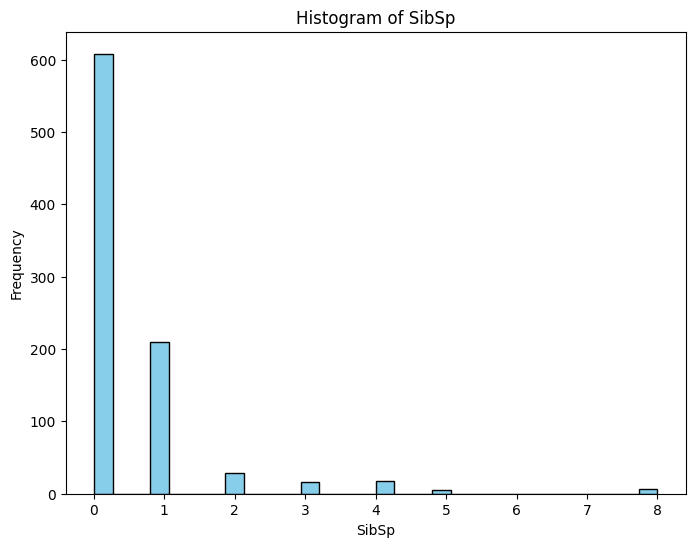

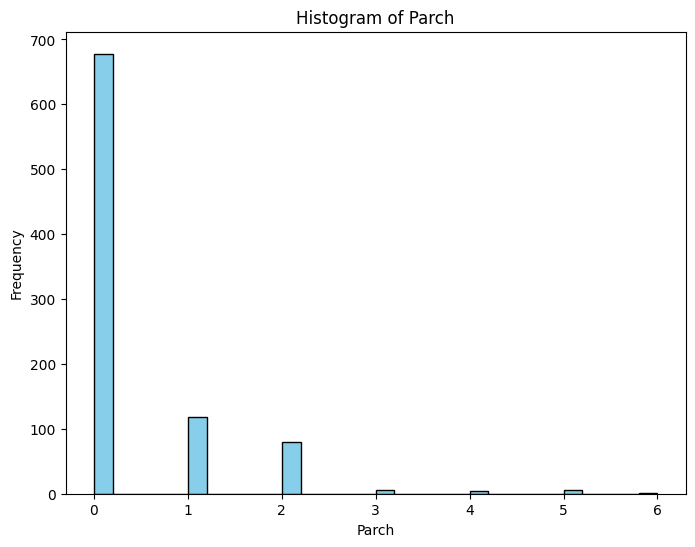

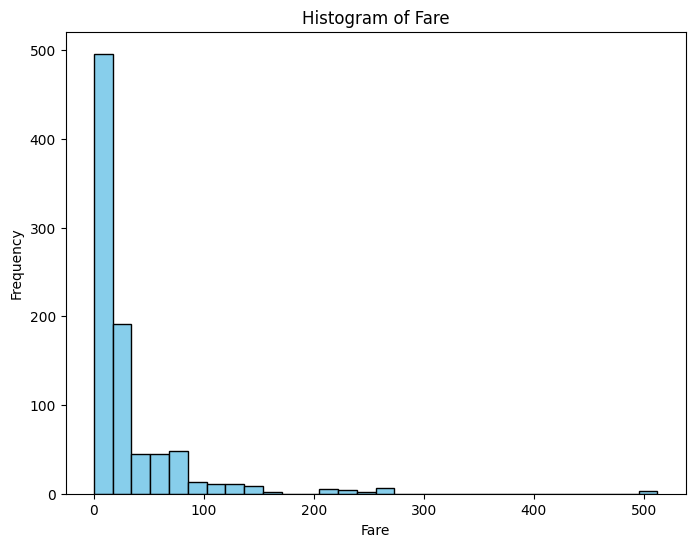

In [ ]:
# Plot histograms for each numerical column to understand distributions
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

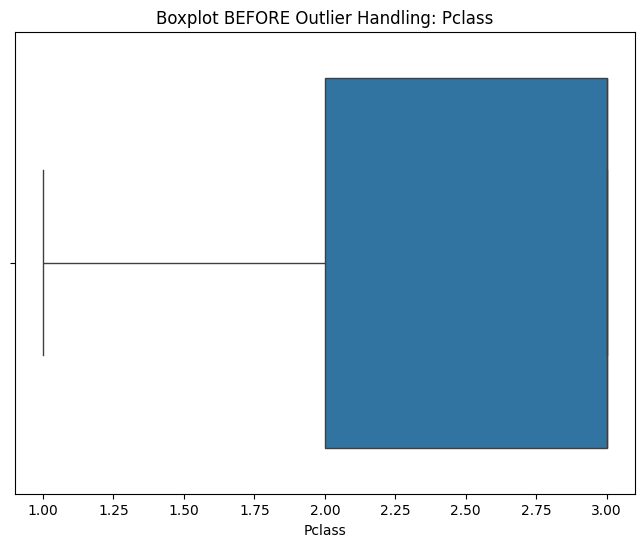

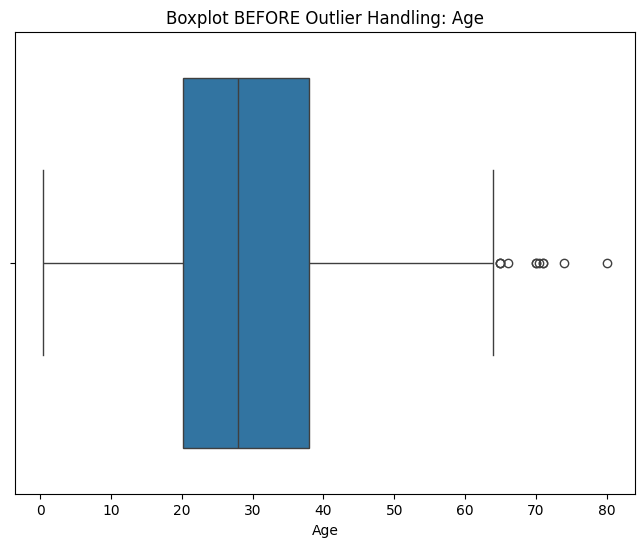

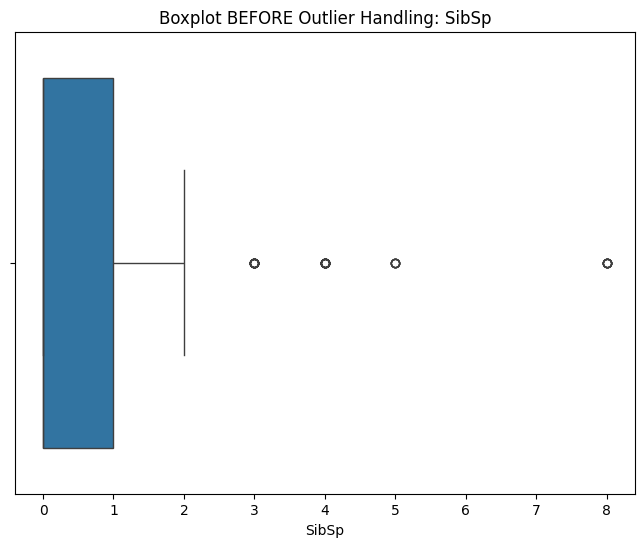

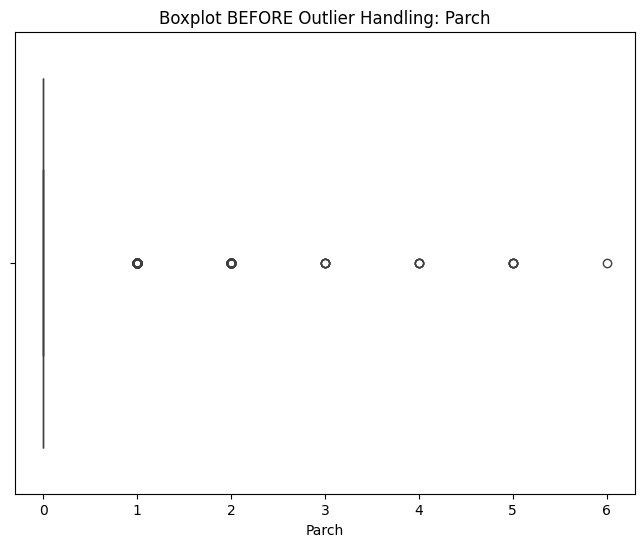

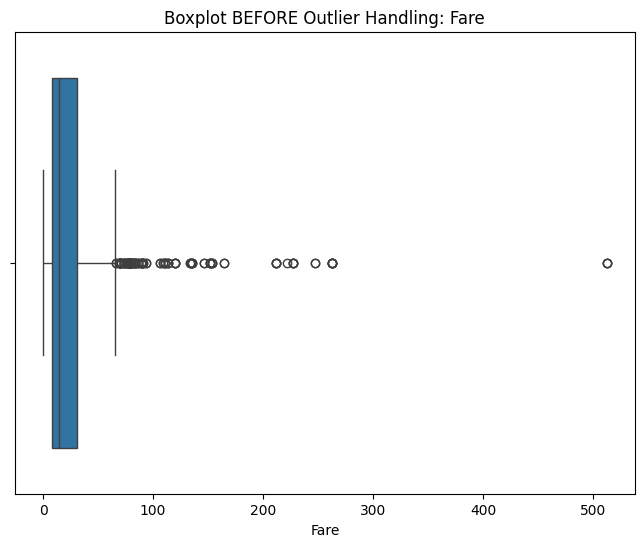

In [ ]:
# Plot boxplots to detect outliers in numerical columns (before handling)
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot BEFORE Outlier Handling: {col}")
    plt.show()

In [ ]:
# Apply IQR method to cap outliers in each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

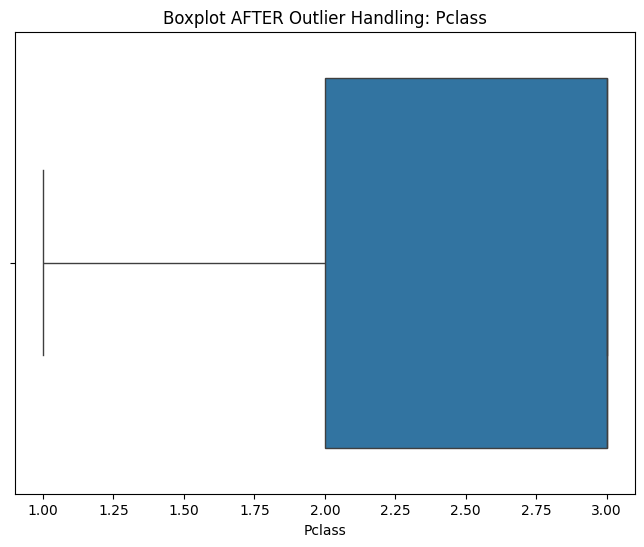

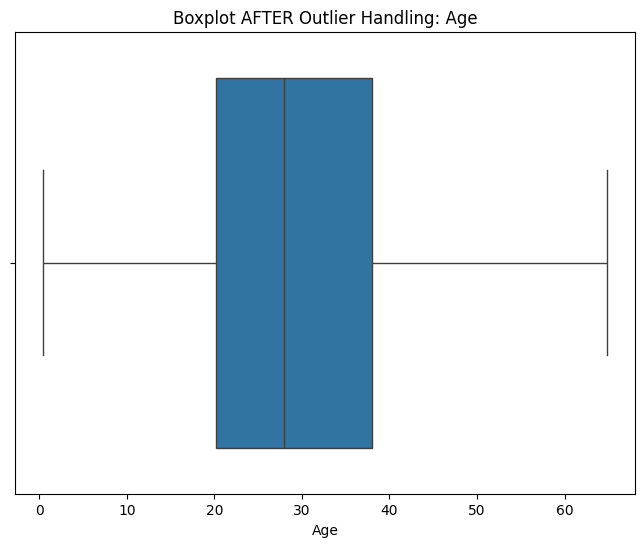

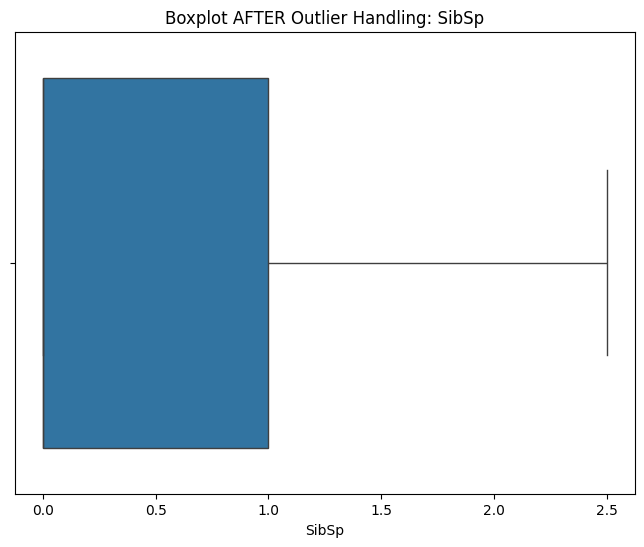

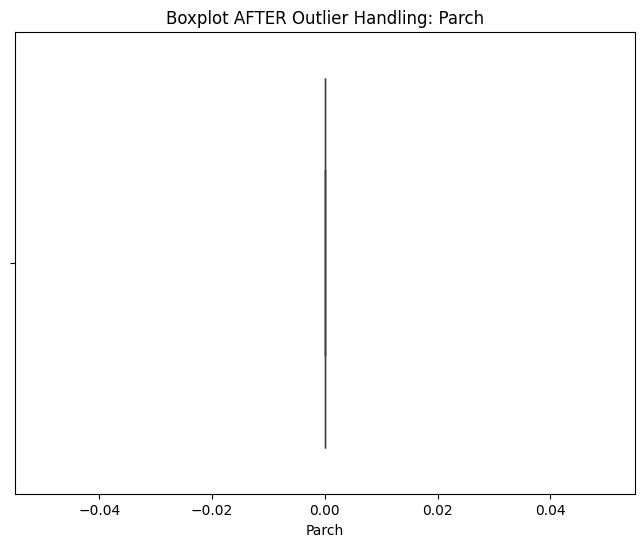

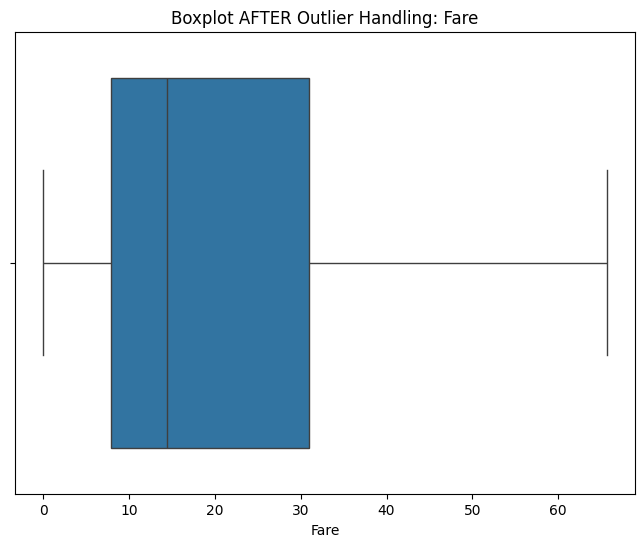

In [ ]:
# Plot boxplots again to verify that outliers have been capped
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot AFTER Outlier Handling: {col}")
    plt.show()

In [ ]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['Sex', 'Embarked']


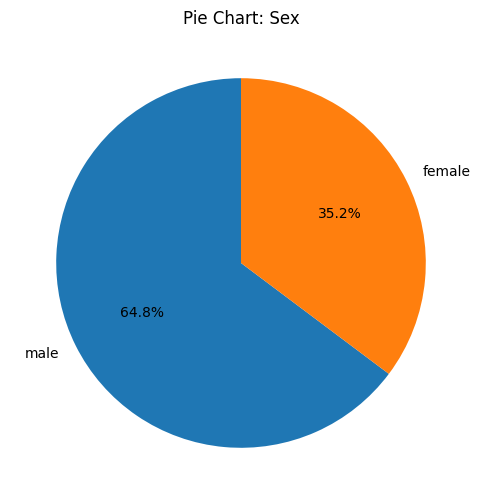

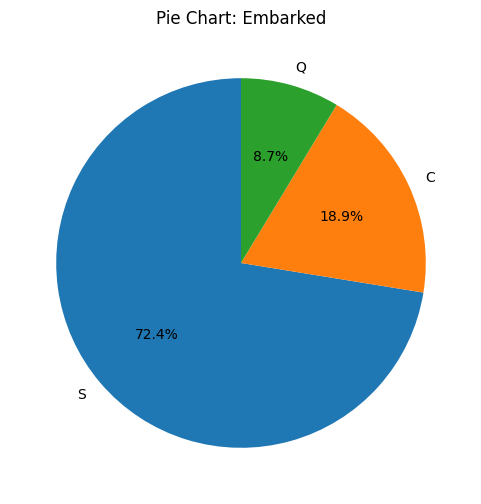

In [ ]:
# Plot pie charts to visualize the distribution of categories
for col in categorical_columns:
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f"Pie Chart: {col}")
    plt.ylabel('')
    plt.show()

In [ ]:
# Display number of missing values before handling
print(df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [ ]:
# Fill missing values in numerical columns with the median
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Fill missing values in categorical columns with the most frequent value (mode)
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# Check again to ensure no missing values remain
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


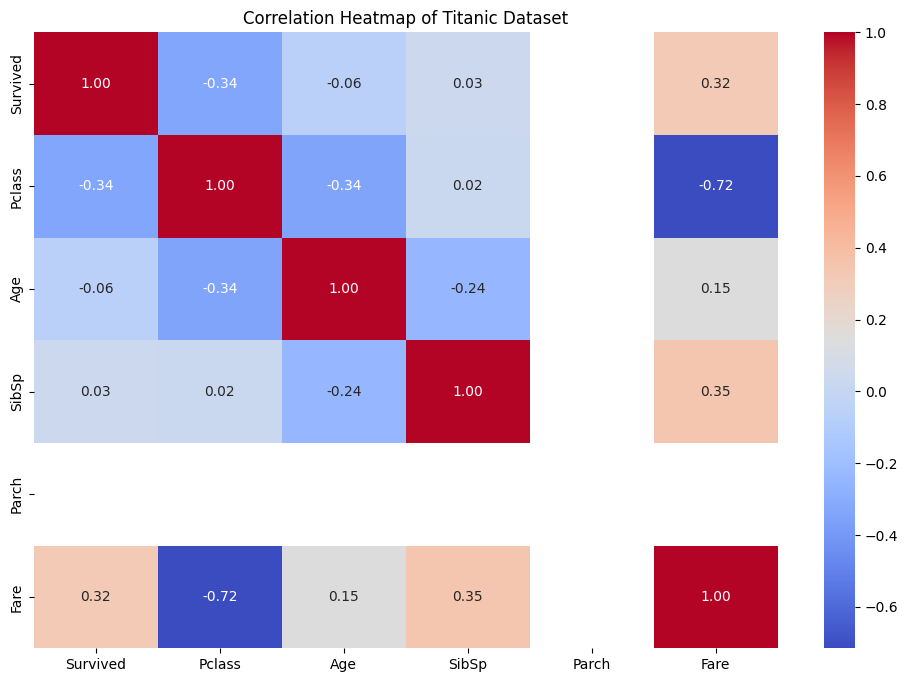

In [ ]:
# Create a correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()

In [ ]:
# Print the covariance matrix of numeric columns
cov_matrix = df.cov(numeric_only=True)
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
           Survived     Pclass         Age     SibSp  Parch        Fare
Survived  0.236772  -0.137703   -0.404759  0.010833    0.0    3.163576
Pclass   -0.137703   0.699015   -3.660711  0.013726    0.0  -12.248875
Age      -0.404759  -3.660711  164.623457 -2.217302    0.0   38.223448
SibSp     0.010833   0.013726   -2.217302  0.501612    0.0    5.071522
Parch     0.000000   0.000000    0.000000  0.000000    0.0    0.000000
Fare      3.163576 -12.248875   38.223448  5.071522    0.0  419.496943


In [ ]:
# Encode categorical variables using Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Standardize the numerical features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Show that data is now standardized (mean ~0, std ~1)
df[numerical_cols].describe()

,Pclass,Age,SibSp,Parch,Fare
count,8.910000e+02,8.910000e+02,8.910000e+02,891.0,8.910000e+02
mean,-8.772133e-17,2.232906e-16,1.196200e-17,0.0,9.968332e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,0.0,1.000562e+00
min,-1.566107e+00,-2.252166e+00,-6.025120e-01,0.0,-1.174727e+00
25%,-3.693648e-01,-5.693003e-01,-6.025120e-01,0.0,-7.882908e-01
50%,8.273772e-01,-1.014044e-01,-6.025120e-01,0.0,-4.686152e-01
75%,8.273772e-01,4.444742e-01,8.102200e-01,0.0,3.396748e-01
max,8.273772e-01,2.769332e+00,2.929318e+00,0.0,2.031623e+00


In [ ]:
# Export the cleaned dataset to a new CSV file
df.to_csv("cleaned_titanic.csv", index=False)